## Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://zenodo.org/record/5550238/files/osdg-community-dataset-v21-09-30.csv?download=1', sep='\t')

In [2]:
df.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286
3,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333
4,10.1787/9789264258211-6-en,0006d6e7593776abbdf4a6f985ea6d95,A region reporting a higher rate will not earn...,3,2,2,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32120 entries, 0 to 32119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              32120 non-null  object 
 1   text_id          32120 non-null  object 
 2   text             32120 non-null  object 
 3   sdg              32120 non-null  int64  
 4   labels_negative  32120 non-null  int64  
 5   labels_positive  32120 non-null  int64  
 6   agreement        32120 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ MB


### Remove unwanted columns


In [4]:
# Remove unwanted columns
# data = data.drop(['doi', 'text_id', 'labels_negative', 'labels_positive', 'agreement']
df = df.drop(['doi', 'text_id', 'labels_negative', 'labels_positive'], axis=1)
df

,text,sdg,agreement
0,"From a gender perspective, Paulgaard points ou...",5,0.750000
1,Labour legislation regulates maximum working h...,11,0.333333
2,The average figure also masks large difference...,3,0.714286
3,The extent to which they are akin to corruptio...,3,0.333333
4,A region reporting a higher rate will not earn...,3,0.000000
...,...,...,...
32115,"It also features individual accountability, wh...",4,1.000000
32116,Since the full capacity is not likely to be ut...,7,0.111111
32117,Groundwater quality can also be affected by co...,6,1.000000
32118,Remedier a ces lacunes est la recommandation p...,2,0.000000


### Remove stop words

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

#remove the punctuations and stopwords
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

[nltk_data] Downloading package stopwords to /Users/pan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['text'] = df['text'].apply(text_process)
df

,text,sdg,agreement
0,gender perspective Paulgaard points labour mar...,5,0.750000
1,Labour legislation regulates maximum working h...,11,0.333333
2,average figure also masks large differences ac...,3,0.714286
3,extent akin corruption difficult assess 2005 g...,3,0.333333
4,region reporting higher rate earn points indic...,3,0.000000
...,...,...,...
32115,also features individual accountability means ...,4,1.000000
32116,Since full capacity likely utilized multiply p...,7,0.111111
32117,Groundwater quality also affected contaminatio...,6,1.000000
32118,Remedier ces lacunes est la recommandation pri...,2,0.000000


In [7]:
df.iloc[0][0]

'gender perspective Paulgaard points labour markets fishing villages highly gendersegregated terms existence male jobs female jobs however new business opportunities led male population peripheral areas working service industry former female jobs boys girls jobs indicates change traditional boundaries women mens work crossed fact young people still working represents continuity past Paulgaard 2002 102 Paulgaard refers continuity traditions refers expectations young adults participate adult culture thus fishing villages traditionally actual youth culture described earlier Paulgaard 2015 concludes Norways peripheral areas school still foreign time waster stealing time young adults instead spend time considered real work'

### Handle missing value

In [9]:
import numpy as np

df["text"].replace(" ", np.nan, inplace=True)
df["text"].replace("", np.nan, inplace=True)
df = df.dropna(subset=["text"])
df

,text,sdg,agreement
0,gender perspective Paulgaard points labour mar...,5,0.750000
1,Labour legislation regulates maximum working h...,11,0.333333
2,average figure also masks large differences ac...,3,0.714286
3,extent akin corruption difficult assess 2005 g...,3,0.333333
4,region reporting higher rate earn points indic...,3,0.000000
...,...,...,...
32115,also features individual accountability means ...,4,1.000000
32116,Since full capacity likely utilized multiply p...,7,0.111111
32117,Groundwater quality also affected contaminatio...,6,1.000000
32118,Remedier ces lacunes est la recommandation pri...,2,0.000000


## Distribution

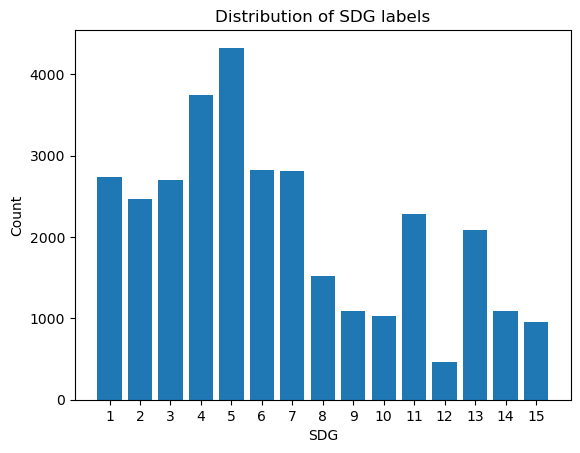

[nltk_data] Downloading package punkt to /Users/pan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df['sdg'].value_counts()
sdg_counts = df['sdg'].value_counts()
plt.bar(sdg_counts.index, sdg_counts.values)

plt.xticks(sdg_counts.index)
plt.xlabel('SDG')
plt.ylabel('Count')
plt.title('Distribution of SDG labels')

plt.show()
# Import nltk packages and Punkt Tokenizer Models
import nltk

nltk.download("punkt")
import warnings

warnings.filterwarnings('ignore')

## Create WordClouds


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sdg_1, sdg_2, sdg_3, sdg_4, sdg_5, sdg_6, sdg_7, sdg_8, sdg_9, sdg_10, sdg_11, sdg_12, sdg_13, sdg_14, sdg_15 = '', '','','','','','','','','','','','','',''

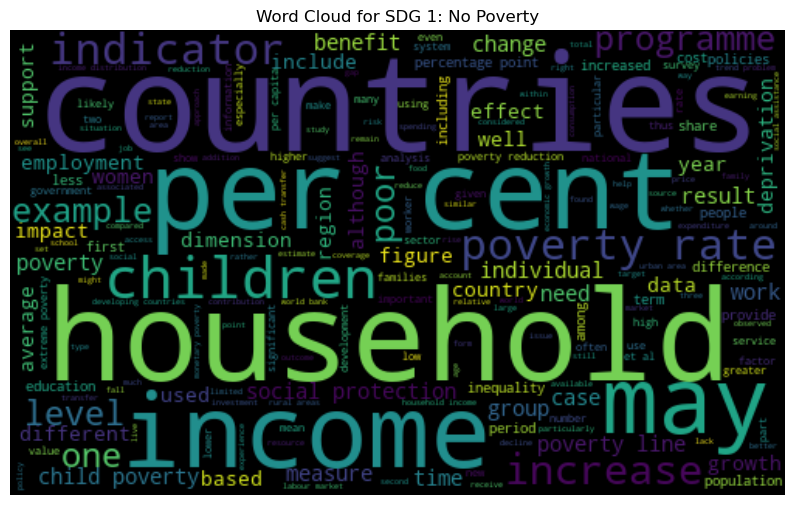

In [22]:
# Creating a corpus of sdg1
for val in df[df['sdg'] == 1].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_1 = sdg_1 + words + ' '

sdg1_wordcloud = WordCloud(width=500, height=300).generate(sdg_1)

if sdg_1:
    sdg1_wordcloud = WordCloud(width=500, height=300).generate(sdg_1)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg1_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 1: No Poverty")
    plt.show()
else:
    print("No text data associated with SDG 1.")

In [ ]:
# Creating a corpus of sdg2
for val in df[df['sdg'] == 2].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_2 = sdg_2 + words + ' '

sdg2_wordcloud = WordCloud(width=500, height=300).generate(sdg_2)

if sdg_2:
    sdg2_wordcloud = WordCloud(width=500, height=300).generate(sdg_2)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg2_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 2: Zero Hunger")
    plt.show()
else:
    print("No text data associated with SDG 2.")

In [ ]:
# Creating a corpus of sdg3
for val in df[df['sdg'] == 3].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_3 = sdg_3 + words + ' '

sdg3_wordcloud = WordCloud(width=500, height=300).generate(sdg_3)

if sdg_3:
    sdg3_wordcloud = WordCloud(width=500, height=300).generate(sdg_3)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg3_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 3: Good Health and Well-being")
    plt.show()
else:
    print("No text data associated with SDG 3.")

In [ ]:
# Creating a corpus of sdg4
for val in df[df['sdg'] == 4].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_4 = sdg_4 + words + ' '

sdg4_wordcloud = WordCloud(width=500, height=300).generate(sdg_4)

if sdg_4:
    sdg4_wordcloud = WordCloud(width=500, height=300).generate(sdg_4)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg4_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 4: Quality Education")
    plt.show()
else:
    print("No text data associated with SDG 4.")

In [ ]:
# Creating a corpus of sdg5
for val in df[df['sdg'] == 5].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_5 = sdg_5 + words + ' '

sdg5_wordcloud = WordCloud(width=500, height=300).generate(sdg_5)

if sdg_5:
    sdg5_wordcloud = WordCloud(width=500, height=300).generate(sdg_5)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg5_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 5: Gender Equality")
    plt.show()
else:
    print("No text data associated with SDG 5.")

In [ ]:
# Creating a corpus of sdg6
for val in df[df['sdg'] == 6].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_6 = sdg_6 + words + ' '

sdg6_wordcloud = WordCloud(width=500, height=300).generate(sdg_6)

if sdg_6:
    sdg6_wordcloud = WordCloud(width=500, height=300).generate(sdg_6)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg6_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 6: Clean Water and Sanitation")
    plt.show()
else:
    print("No text data associated with SDG 6.")

In [ ]:
# Creating a corpus of sdg7
for val in df[df['sdg'] == 7].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_7 = sdg_7 + words + ' '

sdg7_wordcloud = WordCloud(width=500, height=300).generate(sdg_7)

if sdg_7:
    sdg7_wordcloud = WordCloud(width=500, height=300).generate(sdg_7)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg7_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 7: Affordable and Clean Energy")
    plt.show()
else:
    print("No text data associated with SDG 7.")

In [ ]:
# Creating a corpus of sdg8
for val in df[df['sdg'] == 8].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_8 = sdg_8 + words + ' '

sdg8_wordcloud = WordCloud(width=500, height=300).generate(sdg_8)

if sdg_8:
    sdg8_wordcloud = WordCloud(width=500, height=300).generate(sdg_8)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg8_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 8: Decent work and Economic Growth")
    plt.show()
else:
    print("No text data associated with SDG 8.")

In [ ]:
# Creating a corpus of sdg9
for val in df[df['sdg'] == 9].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_9 = sdg_9 + words + ' '

sdg9_wordcloud = WordCloud(width=500, height=300).generate(sdg_9)

if sdg_9:
    sdg9_wordcloud = WordCloud(width=500, height=300).generate(sdg_9)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg9_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 9: Industry, Innovation and Infrasturcture")
    plt.show()
else:
    print("No text data associated with SDG 9.")

In [ ]:
# Creating a corpus of sdg10
for val in df[df['sdg'] == 10].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_10 = sdg_10 + words + ' '

sdg10_wordcloud = WordCloud(width=500, height=300).generate(sdg_10)

if sdg_10:
    sdg10_wordcloud = WordCloud(width=500, height=300).generate(sdg_10)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg10_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 10: Reduced Inequality")
    plt.show()
else:
    print("No text data associated with SDG 10.")

In [ ]:
# Creating a corpus of sdg11
for val in df[df['sdg'] == 11].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_11 = sdg_11 + words + ' '

sdg11_wordcloud = WordCloud(width=500, height=300).generate(sdg_11)

if sdg_11:
    sdg11_wordcloud = WordCloud(width=500, height=300).generate(sdg_11)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg11_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 11: Sustainable Cities and Communities")
    plt.show()
else:
    print("No text data associated with SDG 11.")

In [ ]:
# Creating a corpus of sdg12
for val in df[df['sdg'] == 12].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_12 = sdg_12 + words + ' '

sdg12_wordcloud = WordCloud(width=500, height=300).generate(sdg_12)

if sdg_12:
    sdg12_wordcloud = WordCloud(width=500, height=300).generate(sdg_12)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg12_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 12: Responsible Consumption and Production")
    plt.show()
else:
    print("No text data associated with SDG 12.")

In [ ]:
# Creating a corpus of sdg13
for val in df[df['sdg'] == 13].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_13 = sdg_13 + words + ' '

sdg13_wordcloud = WordCloud(width=500, height=300).generate(sdg_13)

if sdg_13:
    sdg13_wordcloud = WordCloud(width=500, height=300).generate(sdg_13)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg13_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 13: Climate Action")
    plt.show()
else:
    print("No text data associated with SDG 13.")

In [ ]:
# Creating a corpus of sdg14
for val in df[df['sdg'] == 14].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_14 = sdg_14 + words + ' '

sdg14_wordcloud = WordCloud(width=500, height=300).generate(sdg_14)

if sdg_14:
    sdg14_wordcloud = WordCloud(width=500, height=300).generate(sdg_14)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg14_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 14: Life Below Water")
    plt.show()
else:
    print("No text data associated with SDG 14.")

In [ ]:
# Creating a corpus of sdg15
for val in df[df['sdg'] == 15].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_15 = sdg_15 + words + ' '

sdg15_wordcloud = WordCloud(width=500, height=300).generate(sdg_15)

if sdg_15:
    sdg15_wordcloud = WordCloud(width=500, height=300).generate(sdg_15)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg15_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 15: Life On Land")
    plt.show()
else:
    print("No text data associated with SDG 15.")

## Convert words to vectors using TFIDF Vectorizer

In [ ]:
## TODO:

## Select confident instances

In [5]:
# select confident instances (based on agreement score) to train the model
data_agreement = data[data['agreement'] >= 0.6]

## Create K means label

In [ ]:
## TODO:

## Split data into training and test set

In [ ]:
## TODO:

## Model training

In [ ]:
## TODO: K means label

In [ ]:
## TODO: original label

## Evaluate metric

In [ ]:
## TODO: accuracy，f1 score